In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/Data/FullGameStats.csv')

In [3]:
df.head()

,game_id,team_abbr,completed_passes_Quarterbacks,attempted_passes_Quarterbacks,passing_yards_Quarterbacks,passing_touchdowns_Quarterbacks,interceptions_thrown_Quarterbacks,times_sacked_Quarterbacks,yards_lost_from_sacks_Quarterbacks,rush_attempts_Quarterbacks,...,punts_Kickers,total_punt_yards_Kickers,yards_per_punt_Kickers,kickoff_returns,kickoff_return_yards,kickoff_return_touchdown,punt_returns,punt_return_yards,punt_return_touchdown,result
0,201609080den,CAR,18.0,33.0,194.0,1.0,1.0,3.0,18.0,11.0,...,4.0,252.0,63.0,1.0,9.0,0.0,2.0,12.0,0.0,Loss
1,201609080den,DEN,18.0,26.0,178.0,1.0,2.0,2.0,19.0,5.0,...,3.0,140.0,46.7,0.0,0.0,0.0,2.0,26.0,0.0,Win
2,201609110atl,TAM,23.0,32.0,281.0,4.0,1.0,0.0,0.0,4.0,...,5.0,247.0,49.4,1.0,12.0,0.0,0.0,0.0,0.0,Win
3,201609110atl,ATL,27.0,39.0,334.0,2.0,0.0,3.0,12.0,3.0,...,5.0,193.0,38.6,3.0,85.0,0.0,2.0,22.0,0.0,Loss
4,201609110clt,DET,62.0,86.0,725.0,7.0,0.0,3.0,25.0,5.0,...,8.0,430.0,107.6,3.0,47.0,0.0,3.0,12.0,0.0,Win


In [4]:
print(df.shape)
df.dropna(axis=0, how='any', inplace=True)
print(df.shape)

(2244, 74)
(1928, 74)


In [5]:
features = df.drop(columns=['game_id','team_abbr']).columns.to_list()
features.remove('result')

X = df[features]

y = df.result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


In [6]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

clf = RandomForestClassifier(n_estimators=1000, random_state = 1,n_jobs=-1, max_depth=12)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.828
Random Forest: f1-score=0.828


In [8]:
class_names=['Win','Loss']

Confusion matrix, without normalization
[[210  32]
 [ 51 189]]
Normalized confusion matrix
[[0.87 0.13]
 [0.21 0.79]]


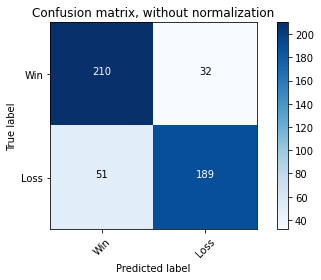

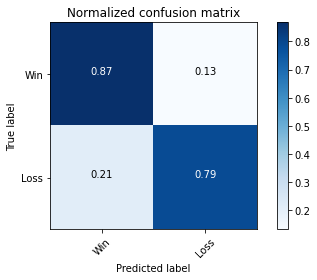

In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

30


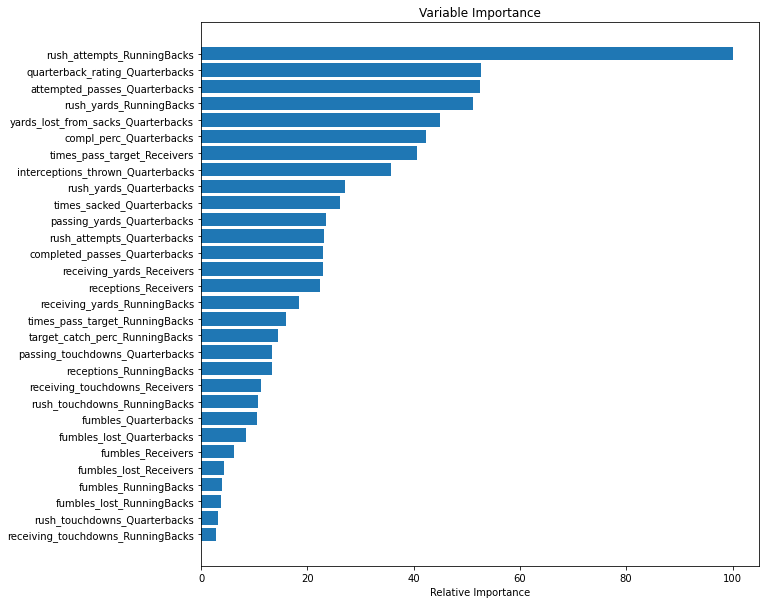

In [10]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [11]:
df2 = df[X.columns[sorted_idx[21:30]].to_list()]
df2['result'] = df['result']

<ipython-input-11-b7485d9e9e3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['result'] = df['result']


In [12]:
df2.shape

(1928, 10)

In [13]:
X = df2.drop(columns='result')

y = df2.result

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= RandomizedSearchCV(knn,param_grid,cv=5, random_state=1)
knn_cv.fit(X,y)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   random_state=1)

In [15]:
y_pred = knn_cv.predict(X_test)

In [16]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7178251800013458
Best Parameters: {'n_neighbors': 46}


Confusion matrix, without normalization
[[185  57]
 [ 72 168]]
Normalized confusion matrix
[[0.76 0.24]
 [0.3  0.7 ]]


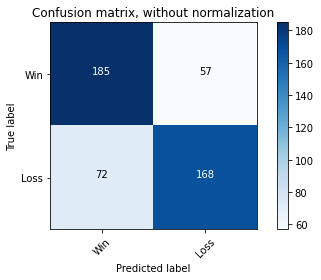

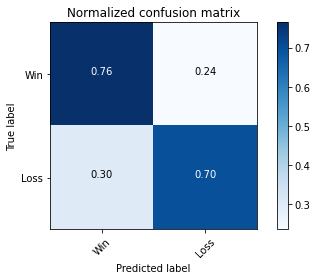

In [17]:
knn = KNeighborsClassifier(n_neighbors=46)
knn.fit(X,y)
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Loss       0.72      0.76      0.74       242
         Win       0.75      0.70      0.72       240

    accuracy                           0.73       482
   macro avg       0.73      0.73      0.73       482
weighted avg       0.73      0.73      0.73       482

